# Project 2 - Image generation and processing



Trym Lervik & Tor Haugen

## Introduction
blablabla




In [71]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

## Task 1 - Generating artificial Images 

### a) 

In [62]:
def my_newton(f, Df, x0 : complex, **kwargs):
    """
    my_newton computes the zero of a function f using Newton's method.
    Inputs:
    f: function
    Df: derivative of f
    x0: initial position
    kwargs: dictionary with optional arguments

    Output:
    x: zero of f (hopefully)
    """
    max_iter = kwargs.get('maxiter', 100)
    x = x0
    for i in range(max_iter):
        x -= f(x)/Df(x) #newton step
    return x

### b)


Per nå en trippel for-loop, det kan vi få til bedre.

In [63]:
def grid_newton(f, Df, n, **kwargs):
    """
    grid_newton runs my_newton over a grid from -1, 1 with n points.
    Inputs:
    f: function
    Df: derivative of f
    n: number of points in the grid

    Output:
    A: n x n matrix with the results of my_newton in grid
    """

    #this is a grid from -1 to 1 with n points
    x = np.linspace(-1, 1, n, endpoint=True)
    y = np.linspace(-1, 1, n, endpoint=True)

    A = np.zeros((n, n), dtype = complex) #creates A matrix

    for i in range(n):
        for j in range(n):
            A[i, j] = my_newton(f, Df, x[i] + 1j*y[j], **kwargs)
    return A


### c)

For the equation $z^3 = 1$ we intuitivly know that with complex values we will get three solutions. with $z \in \mathbb{C}$ we can write $z = x + iy = r e^{i\theta}$. 
$$
    z^3 = 1 \\
    z = 1^{1/3} \\
    z = e^{\frac{i 2 \pi n}{3}}, n ={0, 1, 2, ...} \\
    z = \left\{1, e^{ \pi i \frac{2}{3}}, e^{ \pi i \frac{4}{3}} \right\}
$$
After these three solutions we will get a periodic solution with $n > 2$ and only get the same answers back

When plotting thee numerical solutions we look at the angle $\theta$ to see the solutions. If we look at the angle of z we have
$$
z_{\theta} = \left\{0, \frac{2\pi}{3}, \frac{4\pi}{3} \right\} = \left\{0, 2.094, 4.189 \right\}
$$
With this soulutions we look at the positive angles, but we can get to $\theta = \frac{4 \pi}{3}$ "faster" by going the other way in the unit cirlce. and in this case $\theta = \frac{4 \pi}{3} =  - \frac{2 \pi}{3} = -2.094$. which appears as one of the numerical solutions.

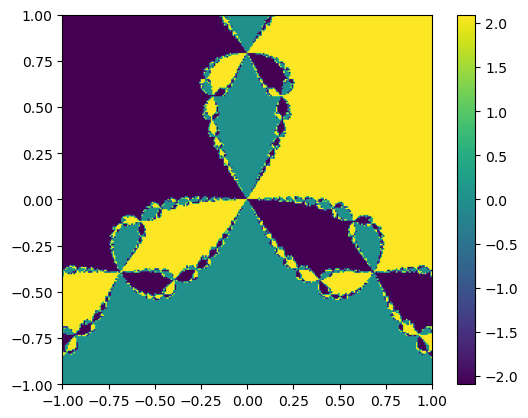

In [64]:
def plot_sol():
    """
    plot_sol plots the solution of the function f(z) = z^3 - 1
    """
    f = lambda z: z**3 - 1
    Df = lambda z: 3*z**2
    A = grid_newton(f, Df, 256)
    plt.imshow(np.angle(A), extent=[-1, 1, -1, 1])
    plt.colorbar()
    plt.show()
plot_sol()

### d)

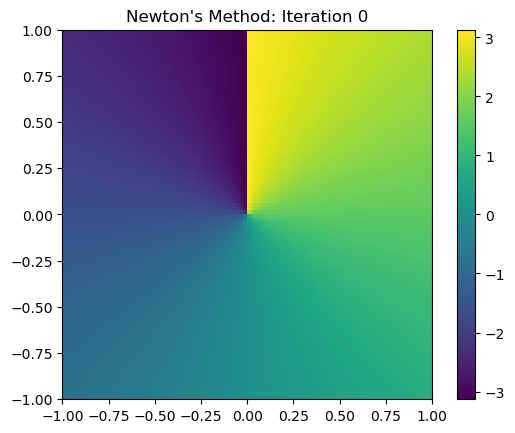

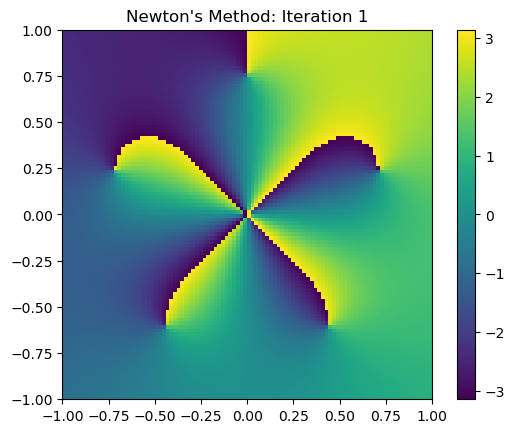

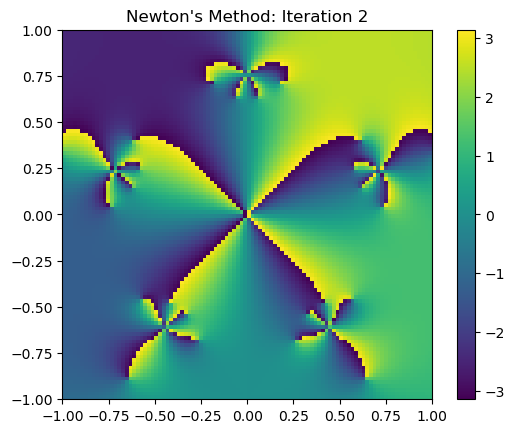

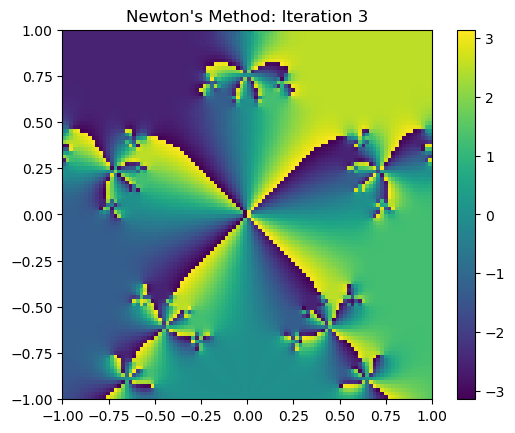

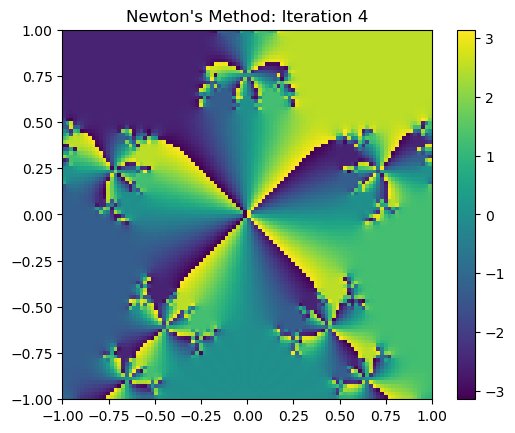

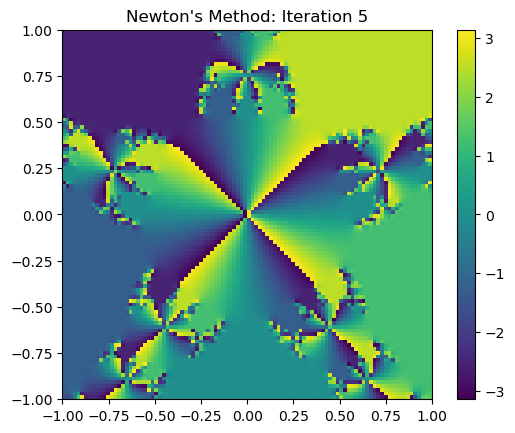

KeyboardInterrupt: 

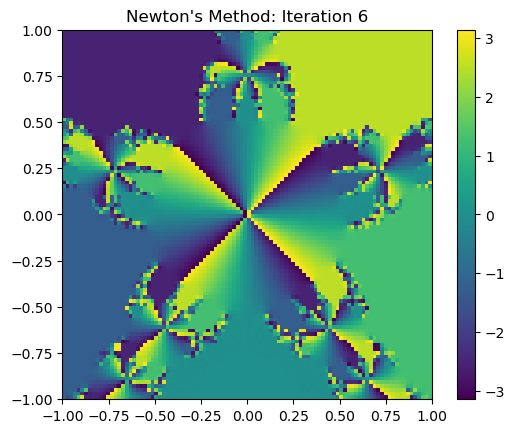

In [88]:
def plot_sol_K():
    """
    plot_sol plots the solution of the function f(z) = z^3 - 1
    """
    f = lambda z: z**5 - 1
    Df = lambda z: 5*z**4
    A = grid_newton(f, Df, 100)
    K = np.arange(0,101,1)
    for k in K:
        kwargs = {'maxiter': k}
        A = grid_newton(f, Df, 100, **kwargs)
        plt.clf()
        plt.imshow(np.angle(A), extent=[-1, 1, -1, 1])
        plt.colorbar()
        plt.title(f"Newton's Method: Iteration {k}")
        plt.pause(0.1)

    plt.show()
plot_sol_K()